# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [26]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [14]:
bank_stocks = pd.read_pickle('all_banks')

In [15]:
df

Bank Ticker    BAC                                       C                  \
Stock Info    Open   High    Low  Close     Volume    Open    High     Low   
Date                                                                         
2006-01-03   46.92  47.18  46.15  47.08   16296700  490.00  493.80  481.10   
2006-01-04   47.00  47.24  46.45  46.58   17757900  488.60  491.00  483.50   
2006-01-05   46.58  46.83  46.32  46.64   14970900  484.40  487.80  484.00   
2006-01-06   46.80  46.91  46.35  46.57   12599800  488.80  489.00  482.00   
2006-01-09   46.72  46.97  46.36  46.60   15620000  486.00  487.40  483.00   
2006-01-10   46.40  46.51  45.88  46.21   15634800  483.00  485.50  480.80   
2006-01-11   46.06  46.25  45.75  46.10   14745100  495.80  495.80  485.80   
2006-01-12   46.22  46.23  45.71  45.80   10546600  491.00  491.00  488.80   
2006-01-13   45.83  46.00  45.68  45.80   10791300  491.00  491.90  487.30   
2006-01-17   45.40  45.58  45.00  45.31   14606100  485.10  487.00  482.70   
2006-01-18   45.32  45.65  44.92  45.18   10911300  484.30  486.70  481.10   
2006-01-19   45.88  45.88  44.85  45.14   14584000  485.60  485.80  477.00   
2006-01-20   45.00  45.15  44.17  44.19   25164400  472.10  474.00  456.30   
2006-01-23   43.50  44.39  43.49  43.96   23459900  460.00  463.80  457.00   
2006-01-24   44.08  44.68  44.04  44.24   13500300  462.90  463.60  459.90   
2006-01-25   44.15  44.65  44.15  44.63   15132000  461.40  463.70  460.10   
2006-01-26   45.00  45.16  44.67  44.90   18449500  465.50  475.50  464.50   
2006-01-27   44.90  45.11  44.61  44.80   12250800  470.10  473.70  466.00   
2006-01-30   44.75  45.35  44.25  44.48   14816000  468.70  469.90  466.60   
2006-01-31   44.65  44.73  44.12  44.23   19151000  468.30  470.50  465.50   
2006-02-01   44.10  44.24  43.86  43.95   15854800  465.90  467.20  461.10   
2006-02-02   43.95  43.97  43.37  43.44   14745300  459.00  461.00  451.00   
2006-02-03   43.30  43.55  42.75  43.09   17097100  450.70  456.10  448.10   
2006-02-06   43.40  43.65  43.24  43.37   12554600  452.60  456.10  450.90   
2006-02-07   43.60  43.87  43.46  43.49   13917200  452.00  453.80  450.00   
2006-02-08   43.55  43.72  43.34  43.67   12564600  453.30  455.30  450.70   
2006-02-09   43.75  44.05  43.70  43.83   13766200  455.00  461.00  454.30   
2006-02-10   43.77  44.02  43.41  43.92    9039000  457.00  460.70  452.50   
2006-02-13   43.70  43.96  43.30  43.70    8329500  460.60  462.30  454.10   
2006-02-14   43.92  44.49  43.73  44.16   17049500  457.80  462.50  457.10   
...            ...    ...    ...    ...        ...     ...     ...     ...   
2015-11-18   17.43  17.87  17.43  17.84   84683912   53.85   55.02   53.76   
2015-11-19   17.78  17.85  17.62  17.69   51517056   54.88   55.30   54.74   
2015-11-20   17.81  17.83  17.59  17.65   56108450   55.37   55.37   54.55   
2015-11-23   17.62  17.73  17.46  17.47   50317909   54.67   54.84   54.15   
2015-11-24   17.26  17.57  17.25  17.47   57915299   53.81   54.51   53.71   
2015-11-25   17.51  17.57  17.41  17.44   34939034   54.29   54.33   53.76   
2015-11-27   17.46  17.50  17.33  17.48   22935528   54.06   54.37   53.72   
2015-11-30   17.48  17.58  17.42  17.43   59755532   54.34   54.46   53.97   
2015-12-01   17.52  17.81  17.48  17.81   74130038   54.40   54.91   54.25   
2015-12-02   17.88  17.89  17.55  17.62   76675759   54.99   55.02   54.03   
2015-12-03   17.68  17.76  17.25  17.30   95810096   54.42   54.60   53.35   
2015-12-04   17.44  17.83  17.38  17.80  103021728   53.66   55.33   53.52   
2015-12-07   17.79  17.80  17.44  17.54   81633309   54.77   54.88   53.91   
2015-12-08   17.39  17.46  17.13  17.19   84873480   53.84   54.01   53.18   
2015-12-09   17.11  17.38  16.87  17.10   82418050   53.05   53.81   52.31   
2015-12-10   17.15  17.41  16.96  17.20   68395011   52.89   53.24   52.17   
2015-12-11   16.97  17.06  16.64  16.73   91503850   51.94   52.21   50.67   
2015-12-14   16.76  16

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [23]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [9]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [16]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [22]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [19]:
returns=pd.DataFrame()

In [24]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


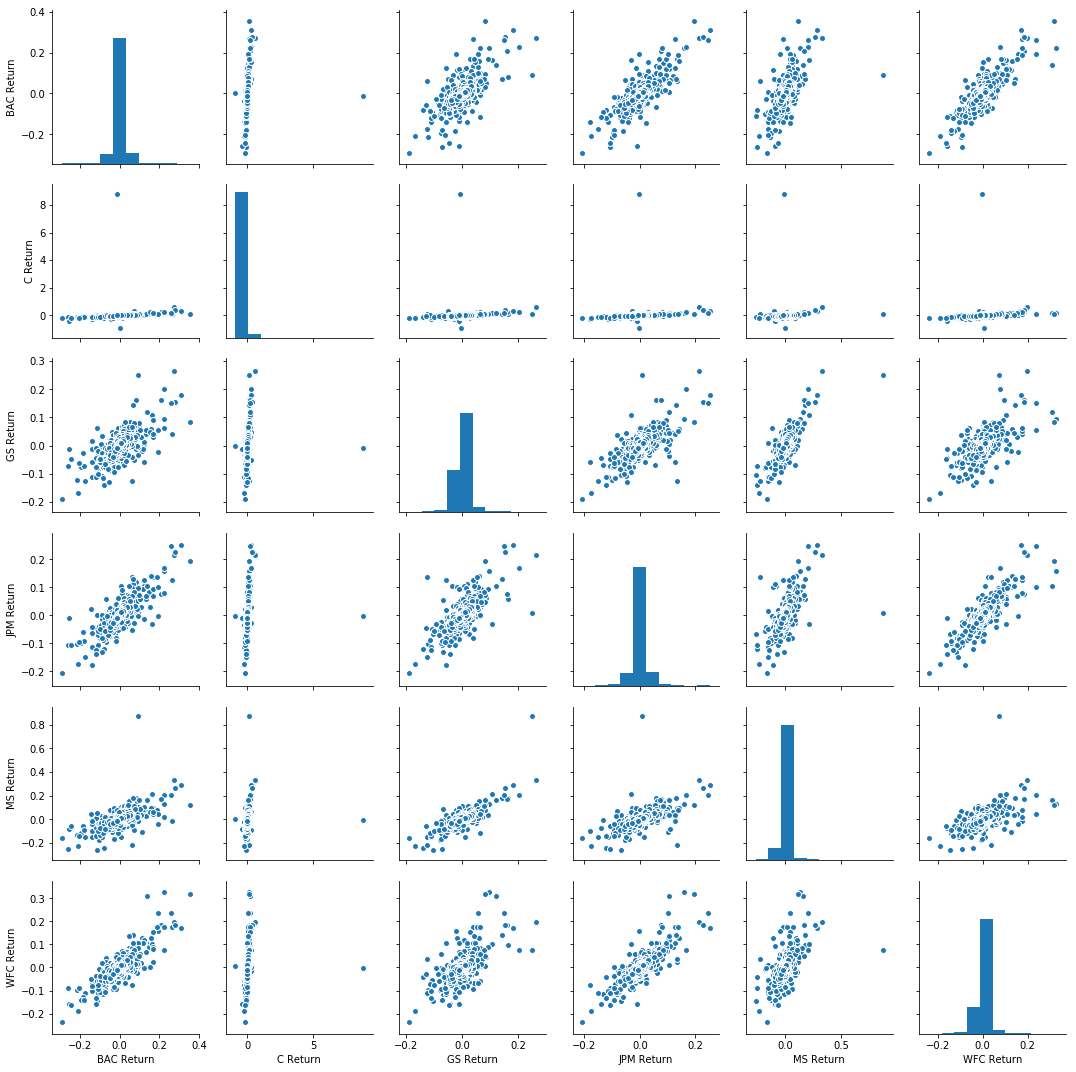

In [34]:
sns.pairplot(returns[1:])

In [36]:
returns.idxmin()

BAC Return   -0.289694
C Return     -0.899107
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WFC Return   -0.238223
dtype: float64

In [37]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [38]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [43]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

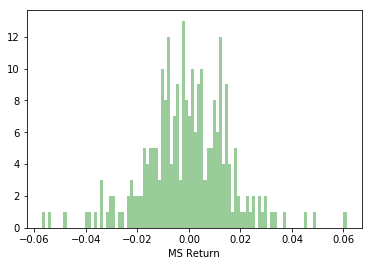

In [46]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100,kde=False)

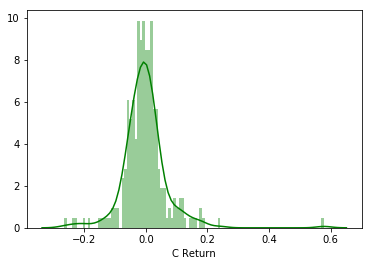

In [47]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='green',bins=100,kde=True)

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


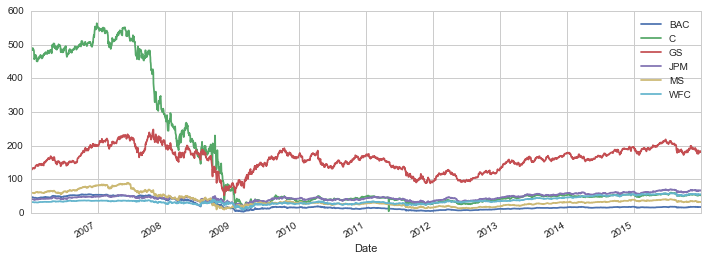

In [17]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

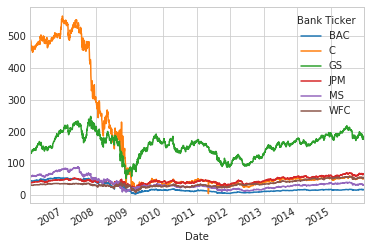

In [51]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [52]:

bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

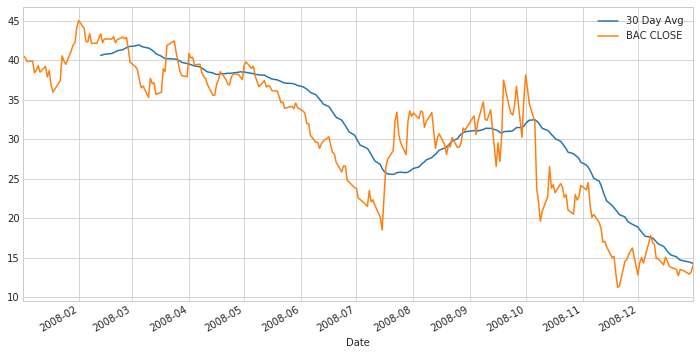

In [56]:
plt.figure(figsize=(12,6))
df.BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
df.BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

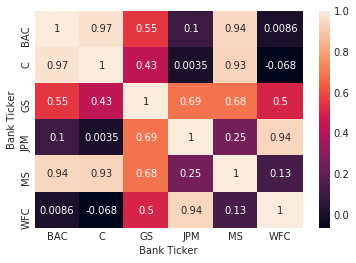

In [57]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

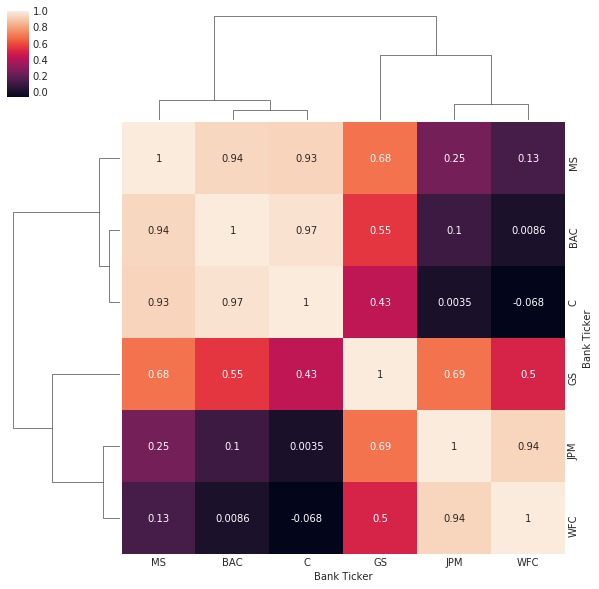

In [58]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [59]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')